In [1]:
# ==========================================================
#     COMPARACIÓN GRÁFICA ENTRE CNN Y XGBOOST
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar predicciones
cnn = pd.read_csv("submission_cnn_per_target.csv")
xgb = pd.read_csv("submission_model2_xgb.csv")

# Alinear por sample_id
merged = cnn.merge(xgb, on="sample_id", suffixes=("_cnn", "_xgb"))

# Calcular diferencia
merged["abs_diff"] = (merged["target_cnn"] - merged["target_xgb"]).abs()

merged.head()


,sample_id,target_cnn,target_xgb,abs_diff
0,ID1001187975__Dry_Clover_g,7.893603,6.647441,1.246162
1,ID1001187975__Dry_Dead_g,12.304406,12.059647,0.244759
2,ID1001187975__Dry_Green_g,22.664375,26.672184,4.007809
3,ID1001187975__Dry_Total_g,44.478160,45.283833,0.805673
4,ID1001187975__GDM_g,26.902075,33.304680,6.402605


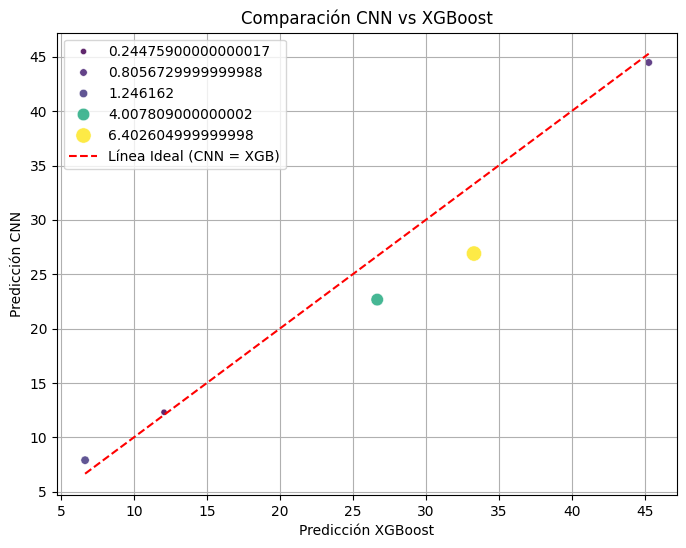

In [2]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=merged,
    x="target_xgb",
    y="target_cnn",
    hue="abs_diff",
    palette="viridis",
    size="abs_diff",
    sizes=(20,120),
    alpha=0.85
)

plt.plot([merged["target_xgb"].min(), merged["target_xgb"].max()],
         [merged["target_xgb"].min(), merged["target_xgb"].max()],
         "r--", label="Línea Ideal (CNN = XGB)")

plt.title("Comparación CNN vs XGBoost")
plt.xlabel("Predicción XGBoost")
plt.ylabel("Predicción CNN")
plt.legend()
plt.grid(True)
plt.show()


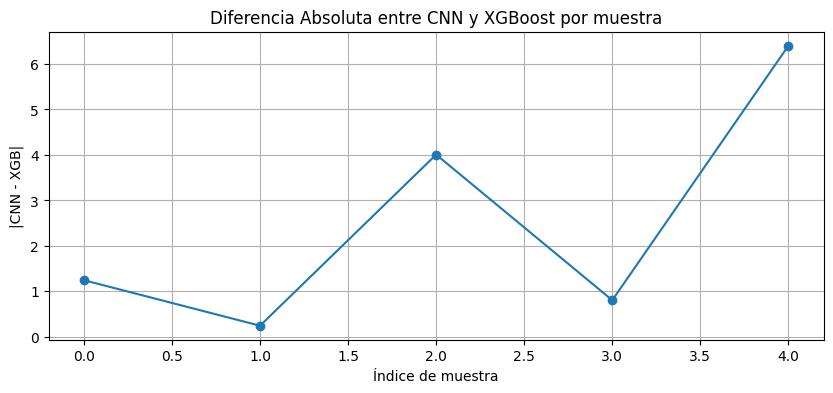

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(merged["abs_diff"].values, marker="o")
plt.title("Diferencia Absoluta entre CNN y XGBoost por muestra")
plt.xlabel("Índice de muestra")
plt.ylabel("|CNN - XGB|")
plt.grid(True)
plt.show()


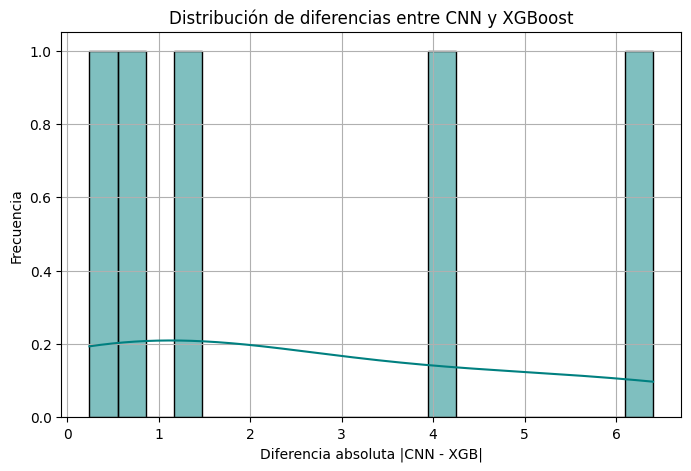

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(merged["abs_diff"], bins=20, kde=True, color="teal")
plt.title("Distribución de diferencias entre CNN y XGBoost")
plt.xlabel("Diferencia absoluta |CNN - XGB|")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()
